In [49]:
import pandas as pd

data = pd.read_csv('/Users/apple/Downloads/ML/ETA_checkin/mh_reservation(Query result).csv')

/var/folders/6w/9qtyzjdd3q3g7fk06nhhv8v00000gn/T/ipykernel_610/1268497154.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/apple/Downloads/ML/ETA_checkin/mh_reservation(Query result).csv')


In [50]:
data

,id,location_id,party_size,kids_size,high_chair_size,seat_together,channel_name,section_id,notes,confirmation_no,reservation_time,cancellation_time,estimate_seconds,actual_dinein_time,actual_dineout_time,notify_party,reservation_status,user_id,created_time,modified_time
0,00001c4e-a639-477a-83bd-e3aac5986f1c,14d293a8-81c5-40b2-a208-be1c03a93fad,4,2,1,True,ONLINE,3f3ba799-77de-4a2f-bad7-70f78bbd06ca,NaN,15570,1/14/2024 18:35,NaN,0,1/14/2024 19:22,NaN,True,L,NaN,1/14/2024 18:35,1/14/2024 19:27
1,0000264d-a86e-421b-97b4-93cbd654f021,22d293a8-81c5-40b2-a208-be1c03a93fad,3,1,0,True,ONLINE,NaN,NaN,4,6/14/2022 17:09,NaN,0,6/14/2022 17:09,6/14/2022 17:11,True,C,7efe7b0c-1e61-4bd2-b04b-1af430b4f50a,6/14/2022 17:09,6/14/2022 17:11
2,000027b6-28e9-4180-8f76-036753098433,88cc107b-bc75-4d1a-9b35-9199e69d3b3d,4,2,0,True,ONLINE,c3d730a1-296a-4457-a645-7361b8c07d47,NaN,35337,6/17/2024 0:16,NaN,0,6/17/2024 1:06,NaN,True,S,NaN,6/17/2024 0:16,6/17/2024 1:07
3,00006140-8c14-4688-b227-27389fd14cb8,88cc107b-bc75-4d1a-9b35-9199e69d3b3d,1,0,0,True,ONLINE,NaN,NaN,5686,05/08/2023 01:35,NaN,0,05/08/2023 01:35,NaN,False,A,NaN,05/08/2023 01:35,05/08/2023 01:35
4,00007b3e-2e79-407d-ab4b-3715c250bc49,88cc107b-bc75-4d1a-9b35-9199e69d3b3d,4,0,0,True,ONLINE,c3d730a1-296a-4457-a645-7361b8c07d47,NaN,17187,8/13/2023 18:21,NaN,0,8/13/2023 18:27,8/13/2023 20:17,True,C,NaN,8/13/2023 18:21,8/13/2023 20:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325248,fffe86b0-2415-4f6f-abfd-8b10da92960d,14d293a8-81c5-40b2-a208-be1c03a93fad,2,0,0,True,ONLINE,3f3ba799-77de-4a2f-bad7-70f78bbd06ca,NaN,15912,1/28/2024 0:43,NaN,0,1/28/2024 0:53,NaN,True,L,NaN,1/28/2024 0:43,1/28/2024 0:58
325249,fffea8ff-462b-4ddf-b13d-cefa971152e9,7e2a8a81-1462-11eb-89a4-42010a010003,4,0,0,True,ONLINE,NaN,NaN,58,07/04/2022 16:56,NaN,0,07/04/2022 16:56,07/04/2022 18:52,True,C,a379a79d-5fc3-4b2b-bb4e-d0c47bb00075,07/04/2022 16:56,07/04/2022 18:52
325250,fffee5b3-76af-4ee0-b7c3-aefe73049132,7e2a8a81-1462-11eb-89a4-42010a010003,3,0,0,True,ONLINE,NaN,NaN,28,3/13/2022 17:24,NaN,0,NaN,NaN,True,I,cf975d9c-ff78-46f8-a1c1-d851460e0f02,3/13/2022 17:24,3/13/2022 17:24
325251,fffeedd0-893c-4dbd-b6cd-05c030f0dbec,7e2a8a81-1462-11eb-89a4-42010a010003,2,0,0,True,ONLINE,4e014b99-1468-11eb-89a4-42010a010007,NaN,9086,6/14/2023 17:32,NaN,0,6/14/2023 17:32,6/15/2023 1:08,True,C,NaN,6/14/2023 17:32,6/15/2023 1:08


In [51]:
specific_location_id = '7e2a8a81-1462-11eb-89a4-42010a010003'
df = data[data['location_id'] == specific_location_id]

In [52]:
df = pd.DataFrame(df)

# Convert reservation_time to datetime format
df['reservation_time'] = pd.to_datetime(df['reservation_time'], format='%m/%d/%Y %H:%M')

# Extract the hour from reservation_time
df['hour'] = df['reservation_time'].dt.hour

# Define bins (hourly intervals from 0 to 23)
bins = list(range(0, 25))  # Bins for each hour of the day (24 hours)
labels = [f'{i:02d}:00-{i+1:02d}:00' for i in range(0, 24)]  # Labels for each hour interval

# Categorize the hours into bins
df['time_bin'] = pd.cut(df['hour'], bins=bins, labels=labels, right=False, include_lowest=True)

# Count the number of reservations in each bin
reservation_counts = df['time_bin'].value_counts().sort_index()

print(reservation_counts)


time_bin
00:00-01:00    17793
01:00-02:00    10890
02:00-03:00     2218
03:00-04:00       79
04:00-05:00       11
05:00-06:00        5
06:00-07:00        7
07:00-08:00        1
08:00-09:00        2
09:00-10:00        2
10:00-11:00        2
11:00-12:00        2
12:00-13:00       11
13:00-14:00        4
14:00-15:00       12
15:00-16:00     2443
16:00-17:00     8362
17:00-18:00    11883
18:00-19:00    10291
19:00-20:00     5159
20:00-21:00     1126
21:00-22:00     2138
22:00-23:00     7519
23:00-24:00    14956
Name: count, dtype: int64


In [32]:
df.head(5)

,id,location_id,party_size,kids_size,high_chair_size,seat_together,channel_name,section_id,notes,confirmation_no,...,reservation_status,user_id,created_time,modified_time,day,month,hour,weekday,season,time_bin
10,0001c3b4-32df-4f9b-b2c3-f2e5135cf5fb,7e2a8a81-1462-11eb-89a4-42010a010003,3,1,0,True,ONLINE,NaN,NaN,63,...,I,3aefac33-d5e8-4b33-bbdf-08fbd2e1ef61,06/02/2022 23:10,06/02/2022 23:10,2,6,23,3,Summer,23:00-24:00
13,00023598-27ac-4203-a247-0e9d4f3cb1c0,7e2a8a81-1462-11eb-89a4-42010a010003,3,0,0,True,ONLINE,NaN,NaN,108,...,C,f61c17b6-5839-4860-8032-77d20c63e945,10/30/2021 22:43,10/30/2021 23:45,30,10,22,5,Autumn,22:00-23:00
14,0002a769-4a13-401d-905a-02541ba49405,7e2a8a81-1462-11eb-89a4-42010a010003,3,0,0,True,ONLINE,NaN,NaN,89,...,C,6f0199f7-e0ac-4482-970a-7227e3991feb,11/13/2021 1:46,11/13/2021 16:38,13,11,1,5,Autumn,01:00-02:00
15,0002ae19-0f50-4d71-adf9-b2c833f3844e,7e2a8a81-1462-11eb-89a4-42010a010003,1,0,0,True,ONLINE,NaN,NaN,59,...,C,NaN,5/23/2022 1:30,5/24/2022 17:26,23,5,1,0,Spring,01:00-02:00
16,0002df69-cfe5-41ef-a10b-c588e4411cb9,7e2a8a81-1462-11eb-89a4-42010a010003,5,1,0,True,ONLINE,4e014b99-1468-11eb-89a4-42010a010007,NaN,13224,...,L,NaN,09/03/2023 17:16,09/03/2023 17:42,3,9,17,6,Autumn,17:00-18:00


In [55]:
import calendar

df = pd.DataFrame(df)

# Convert reservation_time to datetime format
df['reservation_time'] = pd.to_datetime(df['reservation_time'], format='%m/%d/%Y %H:%M')

# Extract the day of the week and store it in a new column 'weekday'
df['weekday'] = df['reservation_time'].dt.day_name()

# Function to validate the weekday
def validate_weekday(row):
    reservation_time = row['reservation_time']
    extracted_weekday = row['weekday']
    actual_weekday = calendar.day_name[reservation_time.weekday()]
    return extracted_weekday == actual_weekday

# Apply the function to validate weekdays
df['is_weekday_correct'] = df.apply(validate_weekday, axis=1)

# Display the DataFrame to see the validation results
print(df)

                                          id  \
0       00001c4e-a639-477a-83bd-e3aac5986f1c   
1       0000264d-a86e-421b-97b4-93cbd654f021   
2       000027b6-28e9-4180-8f76-036753098433   
3       00006140-8c14-4688-b227-27389fd14cb8   
4       00007b3e-2e79-407d-ab4b-3715c250bc49   
...                                      ...   
325248  fffe86b0-2415-4f6f-abfd-8b10da92960d   
325249  fffea8ff-462b-4ddf-b13d-cefa971152e9   
325250  fffee5b3-76af-4ee0-b7c3-aefe73049132   
325251  fffeedd0-893c-4dbd-b6cd-05c030f0dbec   
325252  ffffb648-46ba-4fe6-8a98-c3ffd8d71662   

                                 location_id  party_size  kids_size  \
0       14d293a8-81c5-40b2-a208-be1c03a93fad           4          2   
1       22d293a8-81c5-40b2-a208-be1c03a93fad           3          1   
2       88cc107b-bc75-4d1a-9b35-9199e69d3b3d           4          2   
3       88cc107b-bc75-4d1a-9b35-9199e69d3b3d           1          0   
4       88cc107b-bc75-4d1a-9b35-9199e69d3b3d           4          0 

## ETA

In [34]:
df['reservation_time'] = pd.to_datetime(df['reservation_time'])
df['actual_dinein_time'] = pd.to_datetime(df['actual_dinein_time'])

df['ETA'] = (df['actual_dinein_time'] - df['reservation_time']).dt.total_seconds() / 60

# Display the DataFrame with the time difference
#print(df[['reservation_time', 'actual_dinein_time', 'ETA']])

In [35]:
res_table = pd.read_csv('/Users/apple/Downloads/ML/ETA_checkin/mh_reservation_table(Query result).csv')

In [36]:
specific_location_id = '7e2a8a81-1462-11eb-89a4-42010a010003'
res_table = res_table[res_table['location_id'] == specific_location_id]

In [37]:
len(res_table)

80018

In [38]:
merge = pd.merge(df, res_table, left_on='id', right_on='reservation_id',how='right')

In [40]:
merge['reservation_time'] = pd.to_datetime(merge['reservation_time'])
merge['assignment_time'] = pd.to_datetime(merge['assignment_time'])

# Calculate the difference and create a new column for it
merge['ETA'] = (merge['assignment_time'] - merge['reservation_time']).dt.total_seconds() / 60

# Display the DataFrame with the time difference
#print(df[['reservation_time', 'actual_dinein_time', 'ETA']])

In [41]:
table = pd.read_csv('/Users/apple/Downloads/ML/ETA_checkin/mh_table(Query result).csv')

In [42]:
merge_2 = pd.merge(res_table,table,left_on='table_id',right_on='id',how='left')

In [43]:
merge_2

,id_x,reservation_id,location_id_x,section_id_x,table_id,staff_id,guest_seated,assignment_time,created_time_x,modified_time_x,...,attributes,min_capacity,max_capacity,assigned_staff_id,assigned_time,status,sort_order,is_enabled,created_time_y,modified_time_y
0,0000689b-8c1c-4d19-96cd-5258481ccf3d,62322b8e-b75b-4ad3-9830-ad1c0f9b18ab,7e2a8a81-1462-11eb-89a4-42010a010003,ae015518-1468-11eb-89a4-42010a010007,65ed8940-146d-11eb-89a4-42010a010007,NaN,1,2/6/2022 2:23,2/6/2022 2:23,2/6/2022 2:23,...,NaN,1,2,NaN,6/20/2024 1:15,0,36,True,10/22/2020 13:49,6/20/2024 1:34
1,0000aa3c-47ee-4670-b34f-202ecc2f59ea,2ae2b5d3-8967-40c0-b9fd-7689be4c951a,7e2a8a81-1462-11eb-89a4-42010a010003,ae015518-1468-11eb-89a4-42010a010007,2a62081c-146d-11eb-89a4-42010a010007,NaN,1,5/13/2021 22:10,5/13/2021 22:10,5/13/2021 22:10,...,NaN,1,4,NaN,6/23/2024 16:49,1,23,True,10/22/2020 13:47,6/23/2024 17:49
2,0001fc30-5072-4a8b-9716-47ab55ce108d,387a711e-6e90-4b3e-a6a3-cf60b220a393,7e2a8a81-1462-11eb-89a4-42010a010003,ae015518-1468-11eb-89a4-42010a010007,0d0e030f-146d-11eb-89a4-42010a010007,NaN,3,1/15/2023 22:32,1/15/2023 22:32,1/15/2023 22:32,...,NaN,1,3,NaN,6/24/2024 0:43,1,19,True,10/22/2020 13:46,6/25/2024 17:07
3,00025096-c34c-4119-b35b-c7ae2cfecbad,096f4fda-35ea-4db9-b0f4-6209e1ee256b,7e2a8a81-1462-11eb-89a4-42010a010003,4e014b99-1468-11eb-89a4-42010a010007,704e1fcb-c50b-4f85-bc03-293b3b5bc56d,1.0,2,9/24/2023 1:32,9/24/2023 1:32,9/24/2023 1:32,...,NaN,1,4,NaN,6/23/2024 1:53,1,44,True,4/28/2023 16:15,6/23/2024 1:53
4,0002c5c2-df38-49c9-9e9a-1d7b3e0540e8,6891fa3a-589c-4156-8f35-5bd0ac24a22c,7e2a8a81-1462-11eb-89a4-42010a010003,4e014b99-1468-11eb-89a4-42010a010007,96cbd200-7ce8-4e65-9493-e3e4f31a2eeb,NaN,1,11/3/2021 16:17,11/3/2021 16:17,11/3/2021 16:17,...,NaN,1,2,NaN,6/26/2024 0:59,0,3,True,10/22/2020 13:27,6/26/2024 1:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80013,fffc0b03-2e63-4c6f-9014-48c267994d54,eb1e3f73-d2cf-44c3-a7bb-6de946d90b70,7e2a8a81-1462-11eb-89a4-42010a010003,ae015518-1468-11eb-89a4-42010a010007,1e57ca5f-146d-11eb-89a4-42010a010007,NaN,1,4/10/2022 16:50,4/10/2022 16:50,4/10/2022 16:50,...,NaN,1,4,NaN,6/24/2024 1:09,1,22,True,10/22/2020 13:47,6/24/2024 1:09
80014,fffcfce4-bef7-4c82-a6a3-d285c0421994,c4d9bc9a-992f-49c7-9f85-d0a8c466aa40,7e2a8a81-1462-11eb-89a4-42010a010003,ae015518-1468-11eb-89a4-42010a010007,68792114-146d-11eb-89a4-42010a010007,NaN,1,3/15/2022 23:04,3/15/2022 23:04,3/15/2022 23:04,...,NaN,1,2,NaN,6/23/2024 16:35,1,37,True,10/22/2020 13:49,6/23/2024 18:35
80015,fffe0cd9-2d43-4d3c-8418-681c3244f56d,f7a74726-853f-4de0-a2dc-5888537e8710,7e2a8a81-1462-11eb-89a4-42010a010003,ae015518-1468-11eb-89a4-42010a010007,77fdb917-146d-11eb-89a4-42010a010007,NaN,1,12/18/2021 0:18,12/18/2021 0:18,12/18/2021 0:18,...,NaN,1,4,NaN,6/24/2024 0:39,1,41,True,10/22/2020 13:49,6/24/2024 1:36
80016,fffe54cb-5952-4e7c-995c-53a314497bf5,968cfd2b-1ee9-48d8-8173-b4f70fcc93d4,7e2a8a81-1462-11eb-89a4-42010a010003,ae015518-1468-11eb-89a4-42010a010007,329e07a2-146d-11eb-89a4-42010a010007,NaN,3,9/29/2021 1:00,9/29/2021 1:00,9/29/2021 1:00,...,NaN,1,4,NaN,6/22/2024 17:44,1,25,True,10/22/2020 13:47,6/22/2024 19:11


In [44]:
merge_4 = pd.merge(merge,table,left_on='table_id',right_on='id',how='left')

In [46]:
merge_4

,id_x,location_id_x,party_size,kids_size,high_chair_size,seat_together,channel_name,section_id_x,notes,confirmation_no,...,attributes,min_capacity,max_capacity,assigned_staff_id,assigned_time,status,sort_order,is_enabled,created_time,modified_time
0,62322b8e-b75b-4ad3-9830-ad1c0f9b18ab,7e2a8a81-1462-11eb-89a4-42010a010003,1.0,0.0,0.0,True,ONLINE,NaN,NaN,125.0,...,NaN,1,2,NaN,6/20/2024 1:15,0,36,True,10/22/2020 13:49,6/20/2024 1:34
1,2ae2b5d3-8967-40c0-b9fd-7689be4c951a,7e2a8a81-1462-11eb-89a4-42010a010003,1.0,0.0,0.0,True,ONLINE,NaN,NaN,16.0,...,NaN,1,4,NaN,6/23/2024 16:49,1,23,True,10/22/2020 13:47,6/23/2024 17:49
2,387a711e-6e90-4b3e-a6a3-cf60b220a393,7e2a8a81-1462-11eb-89a4-42010a010003,4.0,1.0,0.0,True,ONLINE,NaN,NaN,2731.0,...,NaN,1,3,NaN,6/24/2024 0:43,1,19,True,10/22/2020 13:46,6/25/2024 17:07
3,096f4fda-35ea-4db9-b0f4-6209e1ee256b,7e2a8a81-1462-11eb-89a4-42010a010003,2.0,0.0,0.0,True,ONLINE,4e014b99-1468-11eb-89a4-42010a010007,NaN,14489.0,...,NaN,1,4,NaN,6/23/2024 1:53,1,44,True,4/28/2023 16:15,6/23/2024 1:53
4,6891fa3a-589c-4156-8f35-5bd0ac24a22c,7e2a8a81-1462-11eb-89a4-42010a010003,1.0,0.0,0.0,True,ONLINE,NaN,NaN,16.0,...,NaN,1,2,NaN,6/26/2024 0:59,0,3,True,10/22/2020 13:27,6/26/2024 1:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80013,eb1e3f73-d2cf-44c3-a7bb-6de946d90b70,7e2a8a81-1462-11eb-89a4-42010a010003,1.0,0.0,0.0,True,ONLINE,NaN,NaN,149.0,...,NaN,1,4,NaN,6/24/2024 1:09,1,22,True,10/22/2020 13:47,6/24/2024 1:09
80014,c4d9bc9a-992f-49c7-9f85-d0a8c466aa40,7e2a8a81-1462-11eb-89a4-42010a010003,1.0,0.0,0.0,True,ONLINE,NaN,NaN,89.0,...,NaN,1,2,NaN,6/23/2024 16:35,1,37,True,10/22/2020 13:49,6/23/2024 18:35
80015,f7a74726-853f-4de0-a2dc-5888537e8710,7e2a8a81-1462-11eb-89a4-42010a010003,1.0,0.0,0.0,True,ONLINE,NaN,NaN,110.0,...,NaN,1,4,NaN,6/24/2024 0:39,1,41,True,10/22/2020 13:49,6/24/2024 1:36
80016,968cfd2b-1ee9-48d8-8173-b4f70fcc93d4,7e2a8a81-1462-11eb-89a4-42010a010003,3.0,0.0,0.0,True,ONLINE,NaN,NaN,38.0,...,NaN,1,4,NaN,6/22/2024 17:44,1,25,True,10/22/2020 13:47,6/22/2024 19:11


In [47]:
merge_4.to_csv('/Users/apple/Downloads/ML/ETA_checkin/final_merge.csv')

In [48]:
merge_4.columns

Index(['id_x', 'location_id_x', 'party_size', 'kids_size', 'high_chair_size',
       'seat_together', 'channel_name', 'section_id_x', 'notes',
       'confirmation_no', 'reservation_time', 'cancellation_time',
       'estimate_seconds', 'actual_dinein_time', 'actual_dineout_time',
       'notify_party', 'reservation_status', 'user_id', 'created_time_x',
       'modified_time_x', 'weekday', 'is_weekday_correct', 'ETA', 'id_y',
       'reservation_id', 'location_id_y', 'section_id_y', 'table_id',
       'staff_id', 'guest_seated', 'assignment_time', 'created_time_y',
       'modified_time_y', 'id', 'location_id', 'section_id', 'table_name',
       'attributes', 'min_capacity', 'max_capacity', 'assigned_staff_id',
       'assigned_time', 'status', 'sort_order', 'is_enabled', 'created_time',
       'modified_time'],
      dtype='object')

In [130]:
merge_4=merge_4.drop(columns=['seat_together','channel_name','section_id_x','notes','confirmation_no','notify_party','user_id','created_time_x','modified_time_x','id_y','reservation_id','location_id_y','section_id_y','staff_id','guest_seated','created_time_y','modified_time_y','id','location_id','section_id','attributes','assigned_staff_id','assigned_time','status','sort_order','created_time','modified_time'])

In [134]:
merge_4 = merge_4.rename(columns={
    'id_x':'reservation_id',
    'location_id_x':'locaion_id',
})

In [136]:
merge_4.to_csv('/Users/apple/Downloads/ML/ETA_checkin/final_merge.csv')

In [4]:
import pandas as pd
from datetime import datetime, timedelta

df = pd.read_csv('/Users/apple/Downloads/ML/ETA_checkin/final_merge.csv')

df['reservation_time'] = pd.to_datetime(df['reservation_time'],format='%d/%m/%Y %H:%M')
df['assignment_time'] = pd.to_datetime(df['assignment_time'],format='%d/%m/%Y %H:%M')

queue_sizes = []

for i in range(len(df)):
    current_reservation_time = df.loc[i, 'reservation_time']
    current_dinein_time = df.loc[i, 'assignment_time']
    
    relevant_rows = df[(df['reservation_time'] <= current_reservation_time) & (df['assignment_time'] >= current_reservation_time)]

    queue_size = len(relevant_rows) - 1  
    
    queue_sizes.append(queue_size) 

# Add the queue_sizes list as a new column in the DataFrame
df['queue_size'] = queue_sizes

# Save the updated DataFrame back to CSV
df.to_csv('/Users/apple/Downloads/ML/ETA_checkin/final_merge.csv', index=False)

print("Queue sizes have been calculated and added to the CSV file.")


/var/folders/6w/9qtyzjdd3q3g7fk06nhhv8v00000gn/T/ipykernel_646/869049325.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/apple/Downloads/ML/ETA_checkin/final_merge.csv')


Queue sizes have been calculated and added to the CSV file.


In [5]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("/Users/apple/Downloads/ML/ETA_checkin/final_merge.csv")

# Convert 'reservation_time' column to datetime if it's not already
df['reservation_time'] = pd.to_datetime(df['reservation_time'])

# Sort by 'reservation_time' column (oldest to newest)
df_sorted = df.sort_values(by='reservation_time')

df_sorted.drop(columns='Unnamed: 0',inplace=True)

df_sorted.to_csv("/Users/apple/Downloads/ML/ETA_checkin/final_merge.csv")

/var/folders/6w/9qtyzjdd3q3g7fk06nhhv8v00000gn/T/ipykernel_646/2818626466.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/apple/Downloads/ML/ETA_checkin/final_merge.csv")


In [10]:
df.columns

Index(['Unnamed: 0', 'reservation_id', 'locaion_id', 'party_size', 'kids_size',
       'high_chair_size', 'reservation_time', 'assignment_time',
       'actual_dinein_time', 'actual_dineout_time', 'reservation_status',
       'hour', 'time_bin', 'weekday', 'table_id', 'Unnamed: 15', 'ETA',
       'table_name', 'min_capacity', 'max_capacity', 'is_enabled',
       'queue_size'],
      dtype='object')

In [7]:
df = df.drop(columns='Unnamed: 0')

In [11]:
df.columns

Index(['Unnamed: 0', 'reservation_id', 'locaion_id', 'party_size', 'kids_size',
       'high_chair_size', 'reservation_time', 'assignment_time',
       'actual_dinein_time', 'actual_dineout_time', 'reservation_status',
       'hour', 'time_bin', 'weekday', 'table_id', 'Unnamed: 15', 'ETA',
       'table_name', 'min_capacity', 'max_capacity', 'is_enabled',
       'queue_size'],
      dtype='object')

In [12]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("/Users/apple/Downloads/ML/ETA_checkin/final_merge.csv")

# Convert 'reservation_time' column to datetime if it's not already
df['reservation_time'] = pd.to_datetime(df['reservation_time'])

df = df[['reservation_id','locaion_id','party_size','kids_size','high_chair_size','reservation_time','actual_dinein_time','actual_dineout_time','hour','time_bin','weekday','table_id','assignment_time','ETA','queue_size']]

df_sorted.to_csv("/Users/apple/Downloads/ML/ETA_checkin/model_input.csv")

/var/folders/6w/9qtyzjdd3q3g7fk06nhhv8v00000gn/T/ipykernel_646/4063279979.py:7: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['reservation_time'] = pd.to_datetime(df['reservation_time'])


## MONTH

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Convert to DataFrame
df = pd.DataFrame(df)

# Convert to datetime
df['reservation_time'] = pd.to_datetime(df['reservation_time'], format='%m/%d/%Y %H:%M')

# Extract day, month, hour, and weekday
df['day'] = df['reservation_time'].dt.day
df['month'] = df['reservation_time'].dt.month
df['hour'] = df['reservation_time'].dt.hour
df['weekday'] = df['reservation_time'].dt.dayofweek  # Monday=0, Sunday=6

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)

# Display the dataframe
print(df.head())


                                     id                           location_id  \
0  00001c4e-a639-477a-83bd-e3aac5986f1c  14d293a8-81c5-40b2-a208-be1c03a93fad   
1  0000264d-a86e-421b-97b4-93cbd654f021  22d293a8-81c5-40b2-a208-be1c03a93fad   
2  000027b6-28e9-4180-8f76-036753098433  88cc107b-bc75-4d1a-9b35-9199e69d3b3d   
3  00006140-8c14-4688-b227-27389fd14cb8  88cc107b-bc75-4d1a-9b35-9199e69d3b3d   
4  00007b3e-2e79-407d-ab4b-3715c250bc49  88cc107b-bc75-4d1a-9b35-9199e69d3b3d   

   party_size  kids_size  high_chair_size seat_together channel_name  \
0           4          2                1          True       ONLINE   
1           3          1                0          True       ONLINE   
2           4          2                0          True       ONLINE   
3           1          0                0          True       ONLINE   
4           4          0                0          True       ONLINE   

                             section_id notes  confirmation_no  ...  \
0  3f3ba7

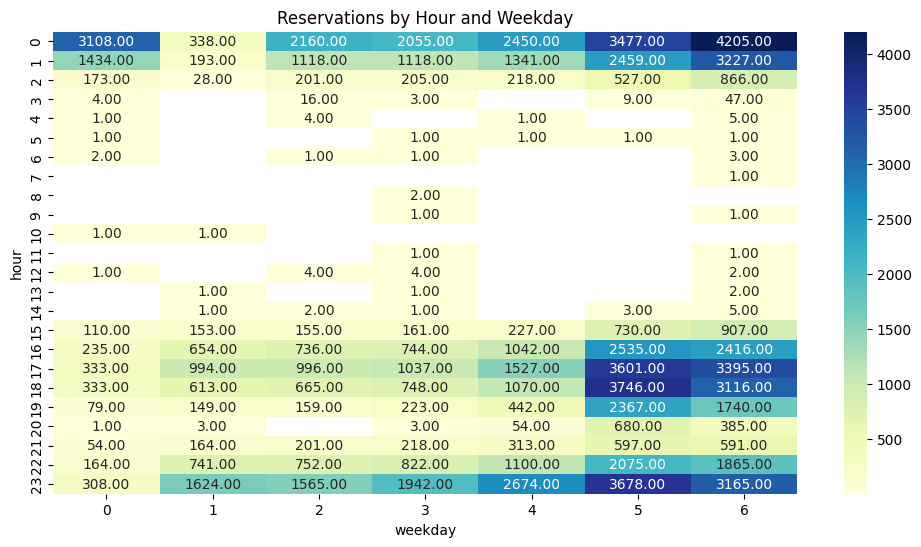

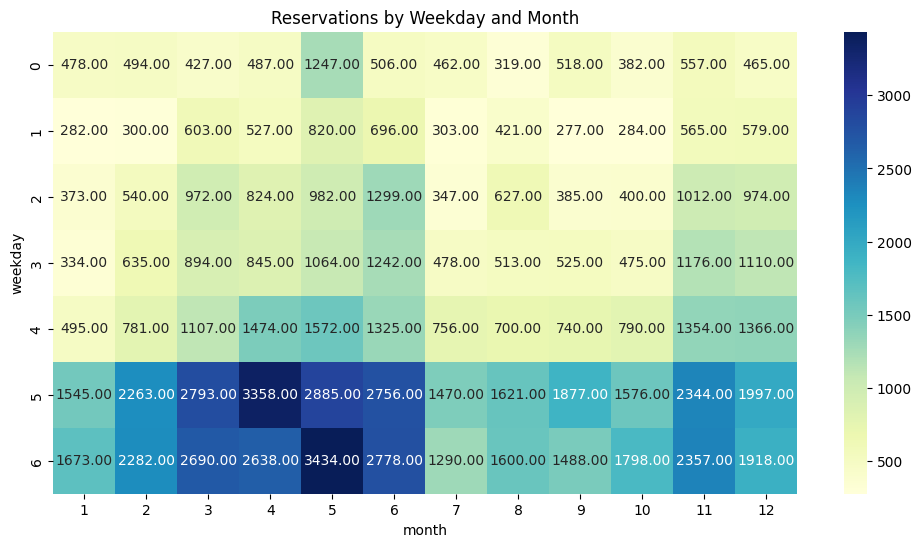

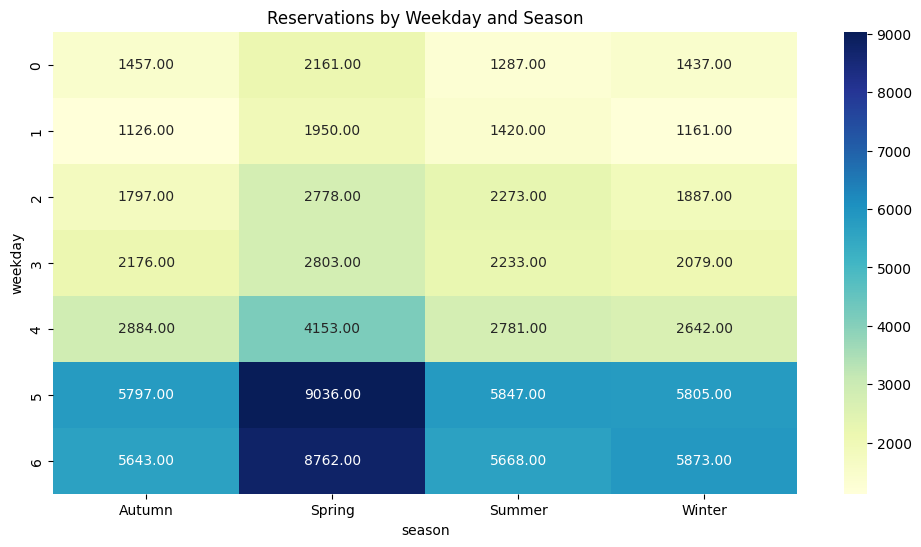

In [28]:
# Heatmap for reservations by hour and weekday
heatmap_data_hour_weekday = df.pivot_table(index='hour', columns='weekday', values='reservation_time', aggfunc='count')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_hour_weekday, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Reservations by Hour and Weekday')
plt.show()

# Heatmap for reservations by weekday and month
heatmap_data_weekday_month = df.pivot_table(index='weekday', columns='month', values='reservation_time', aggfunc='count')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_weekday_month, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Reservations by Weekday and Month')
plt.show()

# Heatmap for reservations by aweekday and season
heatmap_data_weekday_season = df.pivot_table(index='weekday', columns='season', values='reservation_time', aggfunc='count')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_weekday_season, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Reservations by Weekday and Season')
plt.show()


In [30]:
df.columns

Index(['id', 'location_id', 'party_size', 'kids_size', 'high_chair_size',
       'seat_together', 'channel_name', 'section_id', 'notes',
       'confirmation_no', 'reservation_time', 'cancellation_time',
       'estimate_seconds', 'actual_dinein_time', 'actual_dineout_time',
       'notify_party', 'reservation_status', 'user_id', 'created_time',
       'modified_time', 'day', 'month', 'hour', 'weekday', 'season'],
      dtype='object')